# 02807: Project 3
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1 and Project 2)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Wednesday, December 22, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*YOUR TEXT GOES HERE*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 80.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 35 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$



# Group declaration table 

This table must be filled before submission.



In [3]:
import pandas as pd
import matplotlib
%matplotlib inline

d = {'Exercise 1' : ['', '', '', ''], 
     'Exercise 2' : ['', '', '', '']
     } 
  
ct = pd.DataFrame(d, index = ['Part 1','Part 2','Part 3','Part 4']) 

ct

,Exercise 1,Exercise 2
Part 1,,
Part 2,,
Part 3,,
Part 4,,


# Imports

In [4]:
import numpy as np
import random

# Exercise 1: Sampling from a stream (45 points)


Stream sampling is the process of collecting a representative sample of the elements of a data stream. The sample is usually much smaller than the entire stream, but can be designed to retain important characteristics of the stream, and can be used to estimate many important aggregates on the stream. Generating good samples is crucial to many streaming applications.

In this exercise, you will sample simulated streams to solve a problem that goes like this: Given a stream of elements, we want to uniformly sample $k$ elements (without replacement) from it. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return $k$ random elements. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.

Observe that while the simulated streams are simply lists, you should work under the data stream assumption that the population is revealed over time and is too large to fit in memory.

## Part 1: Sampling $k$ elements (5 pts)

Implement the version of reservoir sampling called "Simple algorithm" on the following Wikipedia entry: [Reservoir sampling](https://en.wikipedia.org/wiki/Reservoir_sampling#:~:text=Reservoir%20sampling%20is%20a%20family,to%20fit%20into%20main%20memory).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [5]:
class ReservoirSampler:
    def __init__(self, k):
        """
            A reservoir sampler of size k.
        """
        self.k = k # k is the reservoir size
        self.sample = np.array([np.nan] * k) # sample is the reservoir sample
        self.n = 0 # n is the number of stream elements seen so far
        
    def update(self, element):
        if self.n < self.k:
            self.sample[self.n] = element
        else:
            random_index = randrange(self.n)
            if (random_index < self.k):
                self.sample[random_index] = element
        self.n+=1

In [6]:
from random import randrange
class ReservoirSampler:
    def __init__(self, k):
        """
            A reservoir sampler of size k.
        """
        self.k = k # k is the reservoir size
        self.sample = np.array([np.nan] * k) # sample is the reservoir sample
        self.n = 0 # n is the number of stream elements seen so far
    def update(self, element):
        """
            Reads latest stream element and updates the sample
        """
        self.sample = self.sample[~np.isnan(self.sample)] #remove nan values
        self.n += 1
        
        if len( self.sample ) < self.k:
            self.sample = np.append( self.sample , int(element) )
        else:
            r = int(random.random() * self.n)
            if r < self.k:
                self.sample[r] = element
        return self.sample

Make sure that ``update`` method works correctly. To do so, run the following code cell and check that it updates the reservoir appropriately as stream elements are revealed over time. 

In [7]:
stream = np.arange(20) # a simulated stream
r = ReservoirSampler(2) # reservoir sampler with a reservoir of size 2
for e in stream: # receive stream elements one at a time
    r.update(e)  # update the reservoir
print("Sampled elements:", r.sample)

Sampled elements: [ 6. 10.]


Next, check the reservoir sampler experimentally. Do the following:

1.  100.000 times, draw a sample (using `ReservoirSampler`) of size 4, from the stream above (``np.range(20)``) and store the result. 
2. Plot the number of times that each number in the input stream has been sampled, using a bar chart like the one shown below. 
If your implementation is correct, you should expect to draw each element with roughly the same frequency. 

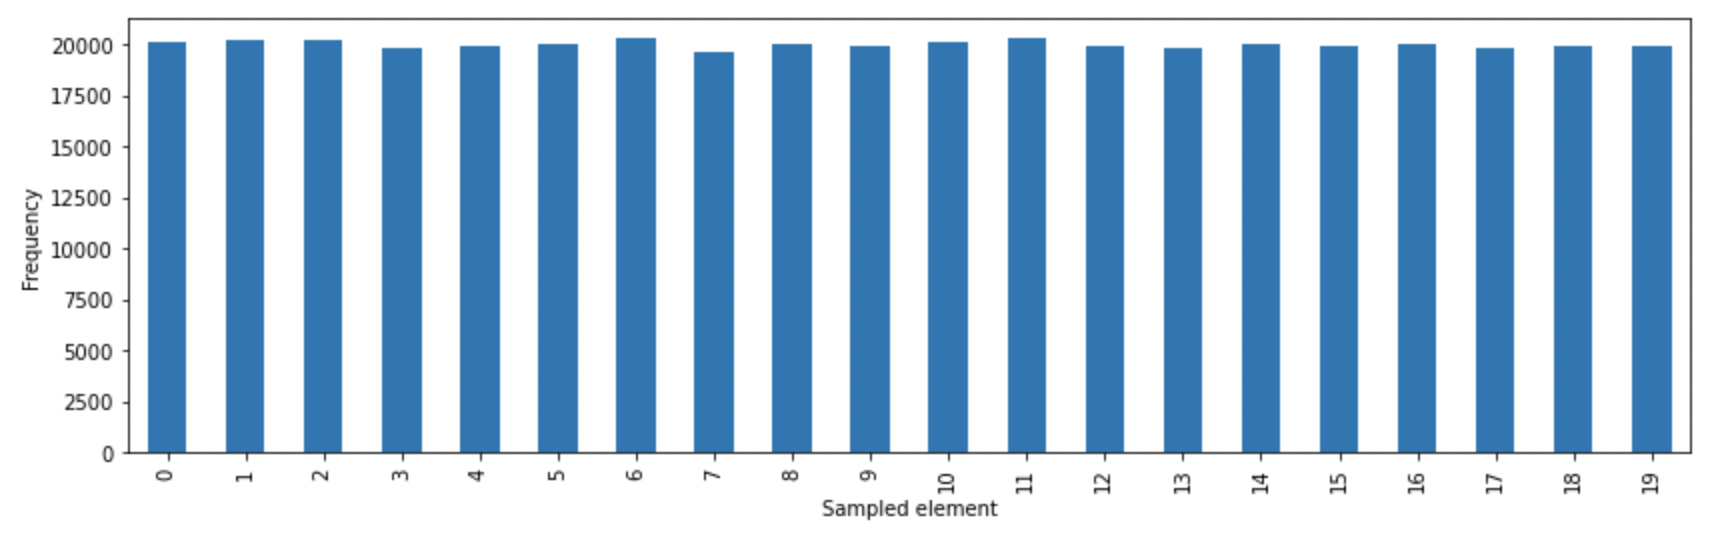


In [8]:
# your code goes here
import matplotlib.pyplot as plt
from collections import Counter
a = []
for i in range(100000):
    stream = np.arange(20) # a simulated stream
    r = ReservoirSampler(4) # reservoir sampler with a reservoir of size 4
    for e in stream: # receive stream elements one at a time
        r.update(e)  # update the reservoir
    #print("Sampled elements:", r.sample)
    a.extend(r.sample)



In [9]:
c = Counter(a)


plt.figure(figsize=(16, 4))
plt.ylabel("Frequency")
plt.xlabel("Sampled element")
plt.bar(c.keys(), c.values(), width = 0.5)
plt.xticks(a)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002397DC68820> (for post_execute):


KeyboardInterrupt: 

## Part 2: Merging reservoir samples: $2$ samples (15 pts)

We will sample from two streams, ``stream_1`` and ``stream_2``, using reservoir sampling, to generate two reservoirs, each of size $k=4$. The input streams are disjoint, i.e., there is no element occurring both in ``stream_1`` and ``stream_2``. 

In [7]:
stream_1 = np.arange(10) # 0 to 9
stream_2 = np.arange(10, 30) # 10 to 29
sampler_1 = ReservoirSampler(4)
sampler_2 = ReservoirSampler(4)

for e in stream_1:
    sampler_1.update(e)
for e in stream_2:
    sampler_2.update(e)  

When both samplers finish their stream traversal, two reservoirs, ``sampler_1.sample`` and ``sampler_2.sample`` have been generated. In addition, both sampler objects have counted the number of items in their own stream during the traversal, and thus the sizes of the input streams are known when the above code cell has been executed. In particular, they are stored in the sampler objects as ``sampler_1.n`` and ``sampler_2.n``. 

We want to combine the two reservoirs we have, ``sampler_1.sample`` and ``sampler_2.sample``, to generate a sample of size $k$ of elements coming from ``stream_1`` and ``stream_2``, where every element in ``stream_1`` and ``stream_2`` is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + n_2}$, where $n_1$ and $n_2$ are the sizes of ``stream_1`` and ``stream_2`` respectively. 

Implement a function called ``merge_samples(sampler_1, sampler_2)`` that generates and returns this sample. The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1`` and ``sampler_2`` to generate the final sample.


**Hint**: ``merge_samples`` should draw an element from ``sampler_1.sample`` with a different probability than from ``sampler_2.sample``, to correct for the fact that the two samples were obtained from streams of different sizes.

In [8]:
def merge_samples(sampler_1, sampler_2):
    """
        Merges the samples produced by sampler_1 and sampler_2 to 
        produce a sample of size sampler_1.k (= sampler_2.k). In
        the produced sample, every element in the original streams 
        should be sampled with equal probability.
        
        :returns: A sample (ndarray) of size k or a ReservoirSampler
    """
    
    merged = ReservoirSampler(4)
    # first we create list of weights for each item from samplers 1 and 2 that we going to use for our choices
    weights = list(map(lambda x: sampler_1.n, sampler_1.sample)) + list(map(lambda x: sampler_2.n, sampler_2.sample))
    # we combine our samples - also convert items to integers with map method
    samples = list(map(int, sampler_1.sample))+list(map(int, sampler_2.sample))

    # we use random.choice method to dynamicaly pick a sample element with diferent probability based on our weights
    merged.sample = random.choices(samples, weights=weights, k=4)
    
    return merged
    #raise NotImplementedError

In [9]:
merge_samples(sampler_1, sampler_2)

Next, check ``merge_samples`` experimentally. Do the following:

1. 50.000 times, create two reservoir samplers ``sampler_1=ReservoirSampler(4)`` and ``sampler_2 = ReservoirSampler(4)`` and update ``sampler_1`` traversing ``stream_1``, and ``sampler_2`` traversing ``stream_2``. Merge the two obtained samples with ``merge_samples`` and store the result.
2. Plot the number of times each number in the two input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.


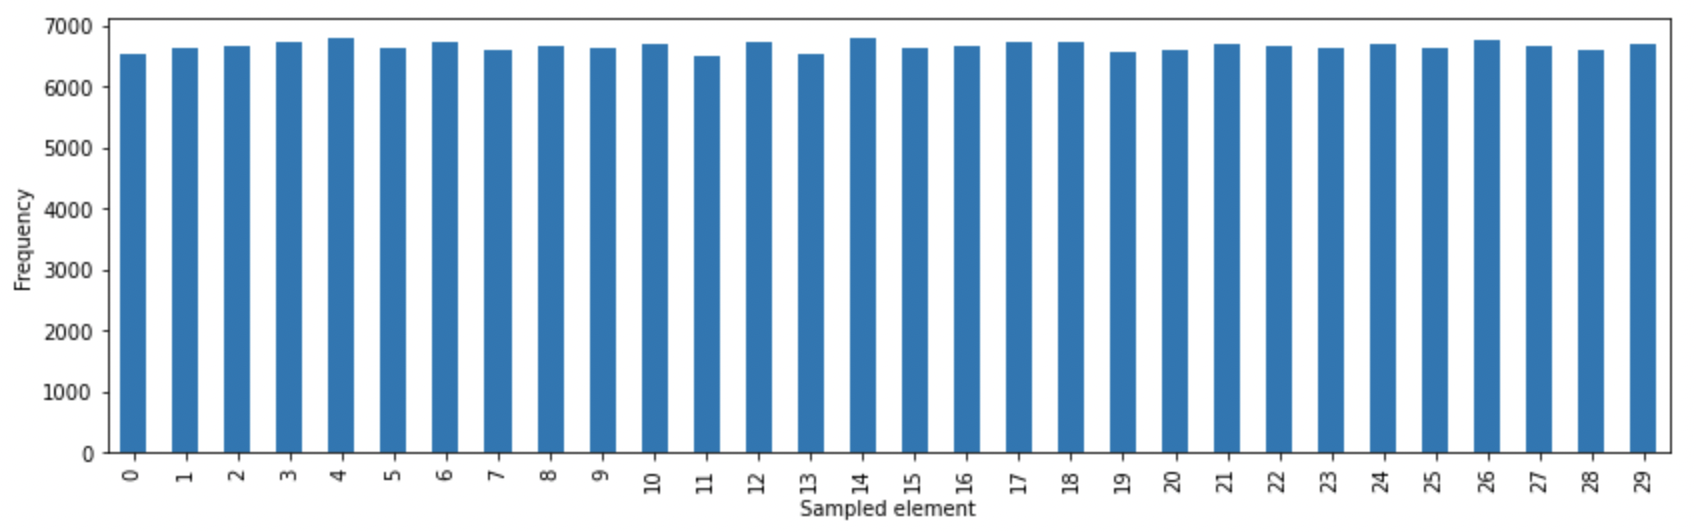


In [10]:
# your code goes here
a=[]
# loop 50.000 times
for i in range(50000):
    
    sampler_1 = ReservoirSampler(4)
    sampler_2 = ReservoirSampler(4)
    
    for e in stream_1:
        sampler_1.update(e)
    for e in stream_2:
        sampler_2.update(e)
    
    # Merge the samples
    merged = merge_samples(sampler_1, sampler_2)

    a.extend(merged.sample)


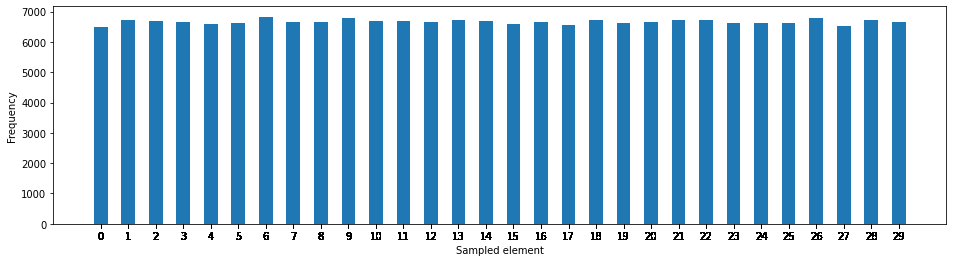

In [11]:
c = Counter(a)

plt.figure(figsize=(16, 4))
plt.ylabel("Frequency")
plt.xlabel("Sampled element")
plt.bar(c.keys(), c.values(), width = 0.5)
plt.xticks(a)
plt.show()

## Part 3: Correctness of `merge_samples` (15 pts)

In the previous part you showed experimentally that each element (number) is sampled with equal probability, namely $\frac{k}{n_1 + n_2}$. In this part you should derive this fact analytically. Your derivation should be based on the property of reservoir sampling and properties of `merge_samples`. 

Below is given a sketch where you should replace *\<fill out\>* to complete the derivation. You must include the substeps of your derivation.

*YOUR TEXT GOES HERE*

The algorithm operates on streams $(a_1, \ldots, a_{n_1})$ and $(b_1, \ldots, b_{n_2})$. Below we consider $i = 1, \ldots, n_1$ and $j = 1, \ldots, n_2$.

By reservoir sampling we have $P(a_i \in sampler_1) = \frac{k}{n_1}$ and $P(b_j \in sampler_2) = \frac{k}{n_2}$, where $sampler_1$ and $sampler_2$ are the samples obtained using `ReservoirSampler`.

Let $merged$ be the sample returned by `merge_samples`, then by the implementation of `merge_samples` we have,

$P(a_i \in merged \mid a_i \in sampler_1) = $ *\<fill out\>*, and 

$P(b_j \in merged \mid b_j \in sampler_2) = $ *\<fill out\>*.

Therefore by $P(A \text{ and } B) = P(A) \cdot P(B \mid A)$ we get, 

$P(a_i \in sampler_1 \text{ and } a_i \in merged) = $*\<fill out\>*, and

$P(b_j \in sampler_2 \text{ and } b_j \in merged) = $*\<fill out\>*.

Hence,
$P(a_i \in sampler_1 \text{ and } a_i \in merged) = P(b_j \in sampler_2 \text{ and } b_j \in merged) = \frac{k}{n_1 + n_2}$ as required.

## Part 4: Merging reservoir samples: $m$ samples (10 pts)

In this part, you have to generalize your solution to Part 2 to develop a method that can combine $m$ reservoir samples, where $m\geq 2$. 

The input streams are disjoint, i.e., there is no element occurring both in ``stream_i`` and ``stream_j``, for any $i,j=1,\dots,m$ such that $i\neq j$. 

Implement a function ``merge_sample_list(sampler_list)`` that takes as input $m$ ``ReservoirSampler`` objects, ``sampler_1``,...,``sampler_m``, each having traversed streams ``stream_1``,...,``stream_m`` respectively, and each having as a result stored a sample of size $k$. 

The function has to use the $m$ reservoir samples to generate a final sample, of size $k$, of elements coming from ``stream_1``,...,``stream_m``, where every element is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + ... + n_m}$, where $n_i$ is the sizes of ``stream_i``, for $i=1,...,m$. 

The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1``,..., ``sampler_m`` to generate the final sample.


**Hint**: you could define ``merge_sample_list`` so that it calls ``merge_sample`` repeatedly. But you are free to define ``merge_sample_list`` in any way you like.

In [10]:
def merge_sample_list(*sampler_list):
    # your code goes here
    merged = ReservoirSampler(4)
    weights = []
    samples = []
    
    for sampler in sampler_list:
        # first we create list of weights for each item from samplers 1 and 2 that we going to use for our choices
        # Also we include sampler sizes into the weights to ensure that the merge going to work with different sampler sizes.    
        weights += list(map(lambda x: sampler.n / sampler.k, sampler.sample))
        # we combine our samples - also convert items to integers with map method
        samples += list(map(int, sampler.sample))

    # we use random.choice method to dynamicaly pick a sample element with diferent probability based on our weights
    merged.sample = random.choices(samples, weights=weights, k=4)
    
    return merged
    
    #raise NotImplementedError

Next, check  ``merge_sample_list`` experimentally. Do the following:

1. 50.000 times, create three reservoir samplers, ``sampler_1=ReservoirSampler(4)``, ``sampler_2 = ReservoirSampler(4)`` and ``sampler_3 = ReservoirSampler(4)``, update ``sampler_1`` traversing ``stream_1 = np.arange(10)``, ``sampler_2`` traversing ``stream_2 = np.arange(10,30)`` and ``sampler_3`` traversing
``stream_3 = np.arange(30,40)``. Merge the three obtained samples with ``merge_sample_list`` and store the result.
2. Plot the number of times each number in the three input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.

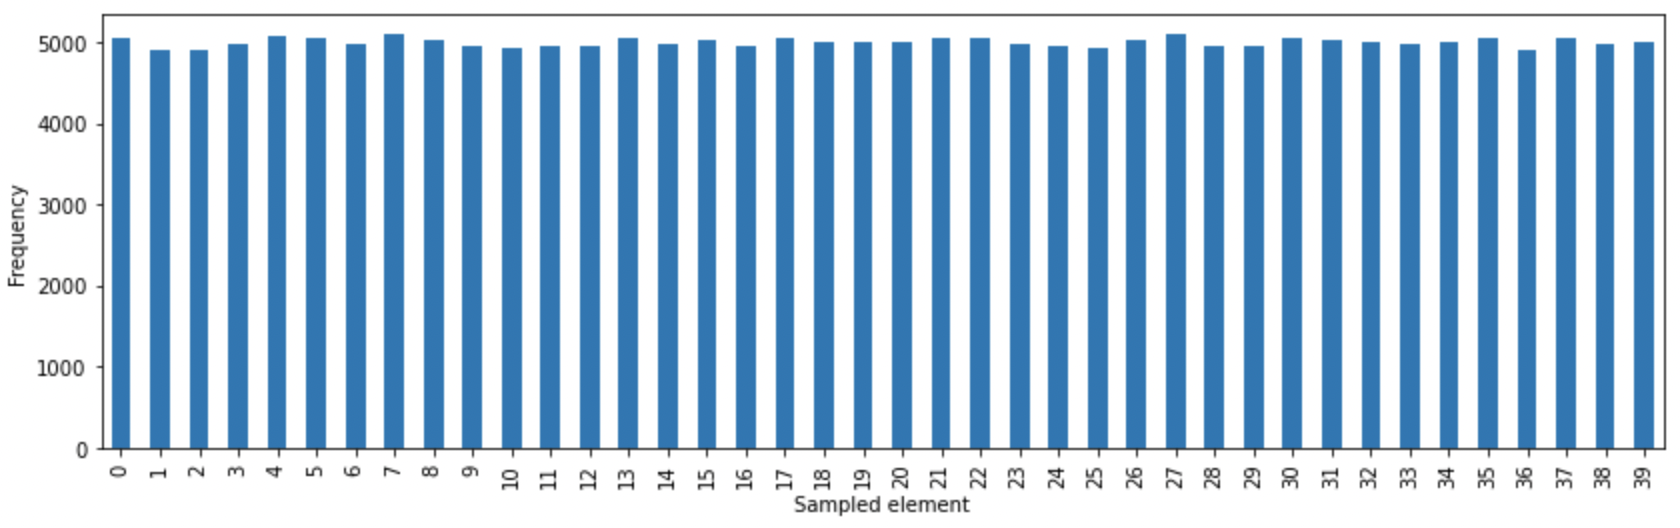


In [13]:
# your code goes here
stream_3 = np.arange(30,40)

a=[]
# loop 50.000 times
for i in range(50000):
    
    sampler_1 = ReservoirSampler(4)
    sampler_2 = ReservoirSampler(4)
    sampler_3 = ReservoirSampler(4)
    
    for e in stream_1:
        sampler_1.update(e)
    for e in stream_2:
        sampler_2.update(e)
    for e in stream_3:
        sampler_3.update(e)
    
    # Merge the samples  
    merged = merge_sample_list(sampler_1, sampler_2, sampler_3)

    a.extend(merged.sample)   

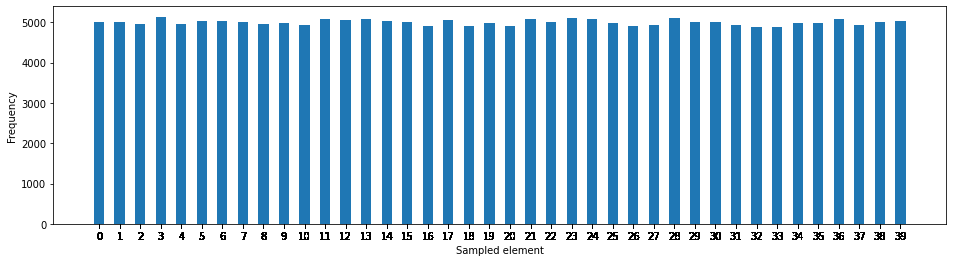

In [14]:
c = Counter(a)

plt.figure(figsize=(16, 4))
plt.ylabel("Frequency")
plt.xlabel("Sampled element")
plt.bar(c.keys(), c.values(), width = 0.5)
plt.xticks(a)
plt.show()

# Exercise 2: Majority elements in a stream (35 points)

A very useful statistic for many streaming applications is to keep track of elements that occur frequently. This type of problem come in several flavours.

- *Mode* : Find the element (or elements) with the highest frequency.
- *Majority*: Find the element with strictly more than 50% occurrence in the stream - note that there may not be a majority element in a stream.
- *Threshold:* Find all elements that occur more than $f$ fraction of the stream
for any $0 < f \leq 1$. Finding majority is a special case with $f > 1/2$.

In this exercise, you will implement methods to compute majority elements from simulated streams. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return a majority element, if it exists. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.


## Part 1: Finding the majority element (5 pts)

Implement the Boyer-Moore majority vote algorithm as described in the following Wikipedia entry: [Boyer-Moore majority vote algorithm](https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_majority_vote_algorithm).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [15]:
class BM_Majority:
    def __init__(self):
        """
            Initialize the Boyer-Moore voting algorithm
        """
        self.majority_element = None
        self.counter = 0
    def update(self, element):
        """
            Reads the latest stream element and updates the
            state of the voting algorithm
        """
        # your code goes here
        if( self.counter == 0 ):
            self.majority_element = element
            self.counter +=1
        elif( self.majority_element == element ):
            self.counter += 1
        else:
            self.counter -= 1
        #raise NotImplementedError

Make sure that the ``update`` method works correctly. To do so, run the following code cell and check that it provides the right output after traversing the stream. 

In [16]:
stream = np.random.randint(low=0, high=10, size=20)
print(stream)
m = BM_Majority()
for e in stream:
    m.update(e)
print("Majority element:", m.majority_element)

[2 9 9 1 8 4 6 6 7 3 4 5 1 3 7 7 5 7 1 5]
Majority element: 7


## Part 2: Finding a true majority element (5 pts)

If the Boyer–Moore majority vote algorithm returns ``majority_element`` $e$, it either holds that $e$ is the majority element or there isn't a majority element.

Modify the implementation of the algorithm so that it always returns the majority element if there is one and ``None`` otherwise. You will need to traverse the stream more than once.

You should create a class `BM_MajorityTrue` with `update` as in Part 1, an extension of `__init__` from Part 1 plus a function `update_second` used in the second traversal of the stream.

In [17]:
# your code goes here
class BM_MajorityTrue:
    def __init__(self):
        # your code goes here
        self.majority_element = None
        self.counter = 0
        
        self.majority_element_counter = 0
        self.total_elements = 0
        self.tru_majority_element = None
        
        # raise error if update_second is run without running update first
        self.is_majority_element_calculated = False
        #raise NotImplementedError
        
    def update(self, element):
        # your code goes here
        if( self.counter == 0 ):
            self.majority_element = element
            self.counter +=1
        elif( self.majority_element == element ):
            self.counter += 1
        else:
            self.counter -= 1
        
        self.is_majority_element_calculated = True
        #raise NotImplementedError

    def update_second(self, element):
        if (self.is_majority_element_calculated) :
            # your code goes here
            self.total_elements += 1
            if(element == self.majority_element):
                self.majority_element_counter += 1
            
            if ((self.majority_element_counter/ self.total_elements) > 1/2):
                self.tru_majority_element = self.majority_element
            else: 
                self.tru_majority_element = None
        else:
            raise AssertionError() # raise error when update has not run
        
        #raise NotImplementedError

Modify the code cell below to test the output of `BM_MajorityTrue`.

In [18]:
stream = np.random.randint(low=0, high=2, size=10)
print(stream)
m = BM_MajorityTrue()
for e in stream:
    m.update(e)
#print("Majority element:", m.majority_element)

# your code goes here
for e in stream:
    m.update_second(e)

#print('Is majority element ', m.is_tru_majority)   
print('Majority element: ', m.tru_majority_element)

[1 1 1 1 1 1 1 1 0 0]
Majority element:  1


## Part 3: Finding the majority element from 2 streams (15 pts)

We will now compute the majority element from two streams, ``stream_1`` and ``stream_2``, using the Boyer-Moore algorithm implemented in Part 1. For this part, we will assume that there are only two possible elements in the stream, ``0`` and ``1``.

In [19]:
stream_1 = np.random.randint(low=0, high=2, size=10)
stream_2 = np.random.randint(low=0, high=2, size=20)

print("Stream 1:", stream_1)
m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

print("Majority element and counter:", m_1.majority_element, m_1.counter)

print("Stream 2:", stream_2)
m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)

print("Majority element and counter:", m_2.majority_element, m_2.counter)

Stream 1: [0 0 0 1 1 1 1 1 1 0]
Majority element and counter: 1 2
Stream 2: [0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1]
Majority element and counter: 0 4


We now have majority candidates and their corresponding counters for each of the two streams.

Implement a function called ``merge_majorities(m_1, m_2)`` that uses the majority elements and counters of ``m_1`` and ``m_2`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,stream_2))``.  The output of ``merge_majorities(m_1, m_2)`` should be identical to the one you would have gotten by processing the stream ``np.concatenate((stream_1,stream_2))`` with one ``BM_Majority()`` object, **whenever there is a majority element in the concatenated stream**. Whenever there is a tie, the output doesn't need to coincide.

The function should neither traverse the streams ``stream_1`` and ``stream_2`` again, nor traverse the stream ``np.concatenate((stream_1,stream_2))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,stream_2))`` using only the majority elements and counters of ``m_1`` and ``m_2``. 

It may be helpful to consider how the groups $U$ and $P$ (cf. Week 13 slides) are formed when there are only two possible element values.

In [20]:
def merge_majorities(m_1, m_2):
    """
    Merges the majority results from m_1 and m_2 to
    produce a new BM_Majority object corresponding to
    the object produced, had the algorithm been run on
    the concatenation of stream_1 and stream_2 (assuming
    a majority element in this concatenation).
    
    :returns: A BM_Majority object
    """
    # your code goes here
    merge = BM_Majority()
    if m_1.majority_element == m_2.majority_element:
        merge.majority_element = m_1.majority_element
    elif m_1.counter > m_2.counter:
        merge.majority_element = m_1.majority_element
    elif m_1.counter < m_2.counter:
        merge.majority_element = m_2.majority_element
    return merge
    
    #raise NotImplementedError

Modify the code cell below so that it tests your implementation of `merge_majorities` on `stream_1` and `stream_2`, and cross-reference this output with the result of applying `BM_Majority` on `np.concatenate((stream_1,stream_2))`.

In [21]:
stream_1 = np.random.randint(low=0, high=2, size=10)
stream_2 = np.random.randint(low=0, high=2, size=20)

m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)

# your code goes here
print("Stream 1:", stream_1)
print("Majority element:", m_1.majority_element, "// counter: ", m_1.counter)
print("Stream 2:", stream_2)
print("Majority element:", m_2.majority_element, "// counter: ", m_2.counter)

Stream 1: [1 0 0 0 0 0 0 0 1 1]
Majority element: 0 // counter:  4
Stream 2: [0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1]
Majority element: 0 // counter:  0


## Part 4: Finding the majority element from $j$ streams (10 pts)

In this part, we have to generalize your solution to Part 2. We will compute the majority element from $j$ streams, ``stream_1``,..., ``stream_j``, using the Boyer-Moore algorithm. We will still assume that there are only two possible elements in the streams, ``0`` and ``1``.

Implement a function ``merge_majorities_list(m_list)`` that takes as input $j$ ``BM_Majority`` objects, ``m_1``,...,``m_j``, each having traversed streams ``stream_1``,...,``stream_j`` respectively to compute their majority elements. 

The function should use the majority elements and counters of ``m_1``,..., ``m_j`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,...,stream_j))``. The output of ``merge_majorities_list(m_list)`` should be identical to the one you would have gotten by processing the stream consisting of the concatenation of ``stream_1``,...,``stream_j`` with one ``BM_Majority()`` object, **whenever there is a majority element in the concatenated stream**. Whenever there is a tie, the output doesn't need to coincide.

The function should neither traverse the streams ``stream_1``,...,``stream_j`` again, nor traverse the stream ``np.concatenate((stream_1,...,stream_j))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,...,stream_j))`` using only the majority elements and counters of ``m_1``,...,``m_j``.

**Hint**: you could define ``merge_majorities_list`` so that it calls ``merge_majorities`` repeatedly. But you are free to define ``merge_majorities_list`` in any way you like.

In [22]:
def merge_majorities_list(m_list):
    """
    Merges the majority results from the elements in
    m_list and produces a new BM_Majority object 
    corresponding to the object produced, had the 
    algorithm been run on the concatenation of 
    stream_1, ..., stream_j (assuming a majority 
    element in this concatenation).
    
    :returns: A BM_Majority object
    """
    # your code goes here
    merge = BM_Majority()
    for i in range(1, len(m_list) - 1):
        if m_list[i - 1].majority_element == m_list[i].majority_element:
            merge.majority_element = m_list[i - 1].majority_element
        elif m_list[i - 1].counter > m_list[i].counter:
            merge.majority_element = m_list[i - 1].majority_element
        elif m_list[i - 1].counter < m_list[i].counter:
            merge.majority_element = m_list[i].majority_element
    return merge
    
    #raise NotImplementedError

Modify the code cell below so that it tests your implementation of `merge_majorities` on `stream_1`, `stream_2` and `stream_3`, and cross-reference this output with the result of applying `BM_Majority` on `np.concatenate((stream_1,stream_2,stream_3))`.

In [23]:
stream_1 = np.random.randint(low=0, high=2, size=10)
stream_2 = np.random.randint(low=0, high=2, size=20)
stream_3 = np.random.randint(low=0, high=2, size=40)

m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)
    
m_3 = BM_Majority()
for e in stream_3:
    m_3.update(e)

# your code goes here
print("Stream 1:", stream_1)
print("Stream 2:", stream_2)
print("Stream 3:", stream_3)
m_list = [m_1, m_2, m_3]

r = merge_majorities_list(m_list)
print(r.majority_element)

Stream 1: [1 0 0 0 0 0 0 0 0 1]
Stream 2: [0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0]
Stream 3: [1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 0 0 0]
0
